In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import pandas_profiling
import numpy as np
import seaborn as sns

C:\Users\visio\AppData\Local\Temp\ipykernel_12848\3247756381.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
df = pd.read_csv("DataSet/emobank.csv")
print(df.head())

                    id  split     V     A     D  \
0  110CYL068_1036_1079  train  3.00  3.00  3.20   
1  110CYL068_1079_1110   test  2.80  3.10  2.80   
2  110CYL068_1127_1130  train  3.00  3.00  3.00   
3  110CYL068_1137_1188  train  3.44  3.00  3.22   
4  110CYL068_1189_1328  train  3.55  3.27  3.46   

                                                text  
0        Remember what she said in my last letter? "  
1                          If I wasn't working here.  
2                                                .."  
3  Goodwill helps people get off of public assist...  
4  Sherry learned through our Future Works class ...  


In [3]:
V, A, D = df["V"],df["A"],df["D"]

# Scatter plot

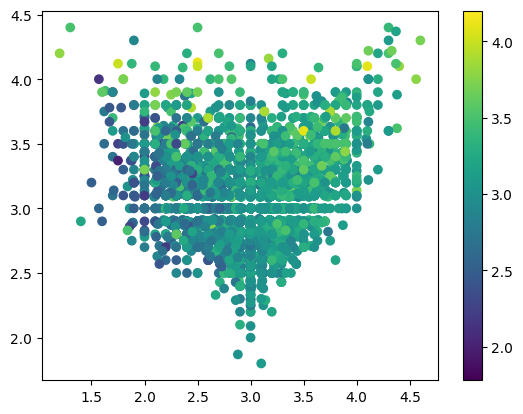

In [4]:
plt.scatter(V, A, c=D, cmap="viridis")
plt.colorbar()
plt.show()

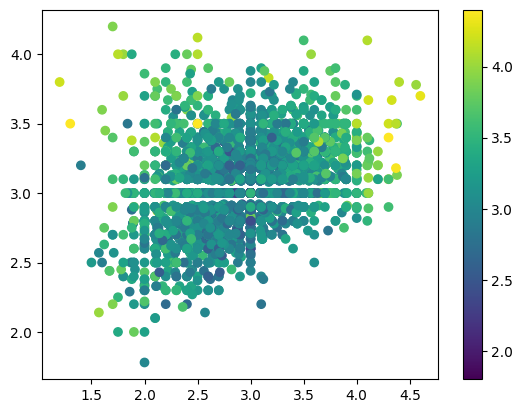

In [5]:
plt.scatter(V, D, c=A, cmap="viridis")
plt.colorbar()
plt.show()

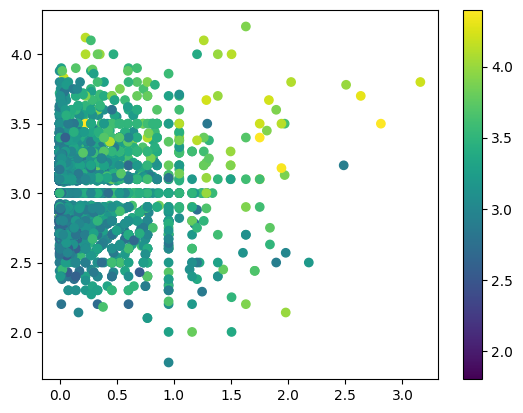

In [6]:
V_mean = np.mean(V)
V_dev2 = (V - V_mean)**2

plt.scatter(V_dev2, D, c=A, cmap="viridis")
plt.colorbar()
plt.show()

# Pair plot

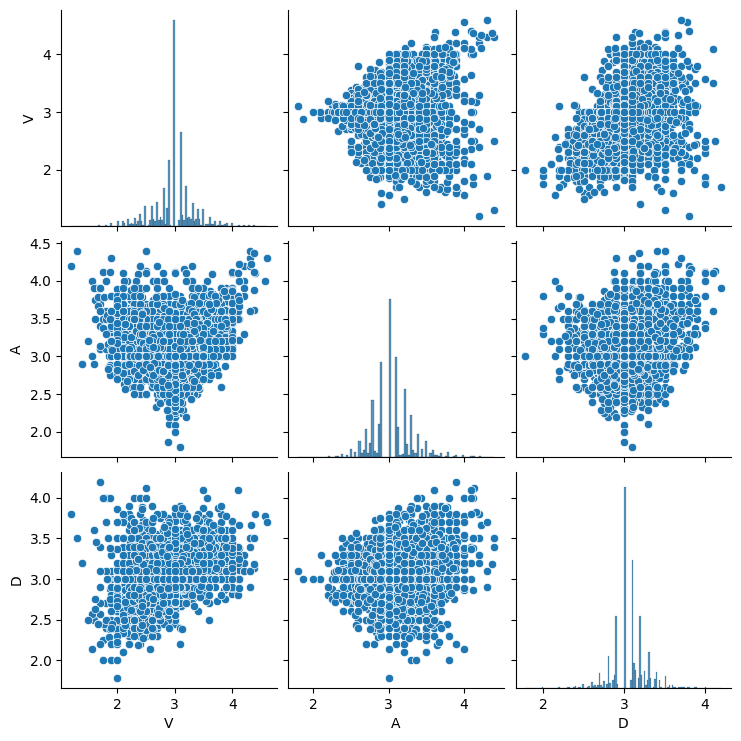

In [7]:
sns.pairplot(df[['V', 'A', 'D']])

# Pearson Correlation Coefficient

In [8]:
correlation_matrix = df[['V','D','A']].corr()
print("Pearson Correlation Coefficient")
print(correlation_matrix)

Pearson Correlation Coefficient
          V         D         A
V  1.000000  0.381647  0.038561
D  0.381647  1.000000  0.204960
A  0.038561  0.204960  1.000000


# Chi square test

In [9]:
contingency_table = [V, A, D]
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2_statistic)
print("p-value:", p_value)

Chi-square statistic: 432.52809485237304
p-value: 1.0


# Cramér's V

In [10]:
cross_table = np.array(contingency_table)
n = np.sum(expected) 
v = np.sqrt(chi2_statistic / (n * (min(cross_table.shape) - 1)))
print("Cramér's V:", v)

Cramér's V: 0.048649400624809186


# Pandas Report

In [11]:
pr = df.profile_report()
pr.to_file("DataSet/EmoBank_Profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
pr